In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn import datasets



In [143]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [249]:
df=pd.read_csv("dataready2019.csv")


C:\Users\tiwar\AppData\Local\Temp\ipykernel_15120\1303901293.py:1: DtypeWarning: Columns (3,4,8,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("dataready2019.csv")


In [145]:
df.columns

Index(['trip_id', 'stoptime', 'bikeid', 'tripduration', 'Trip Time',
       'Trip Duration', 'from_station_id', 'to_station_id', 'usertype',
       'latitude_start', 'longitude_start', 'latitude_end', 'longitude_end',
       'dist', 'day', 'hour', 'month', 'startday', 'weekend', 'holiday',
       'Temp', 'Humidity', 'Rain Intensity', 'Wind Speed'],
      dtype='object')

In [152]:
#df.columns = ['trip_id', 'stop_time', 'bike_id']

In [153]:
df.head(10)

,trip_id,stoptime,bikeid,tripduration,Trip Time,Trip Duration,from_station_id,to_station_id,usertype,latitude_start,longitude_start,latitude_end,longitude_end,dist,day,hour,month,startday,weekend,holiday,Temp,Humidity,Rain Intensity,Wind Speed
0,21742443,01-01-2019 00:11,2167,390,6.5,6,199,84,Subscriber,41.890912,-87.626804,41.891578,-87.648384,1.787819241,1,0,1,01-01-2019,0,1,2.8,90,0.0,2.8
1,21742446,01-01-2019 00:43,252,"1,783.00",29.716667,29,123,176,Subscriber,41.922695,-87.697153,41.902973,-87.631280,5.875402565,1,0,1,01-01-2019,0,1,2.8,90,0.0,2.8
2,21742447,01-01-2019 00:20,1170,364,6.066667,6,173,35,Subscriber,41.896910,-87.621743,41.892278,-87.612043,0.953881898,1,0,1,01-01-2019,0,1,2.8,90,0.0,2.8
3,21742448,01-01-2019 00:19,2437,216,3.6,3,98,49,Subscriber,41.882664,-87.632530,41.881320,-87.629521,0.290512343,1,0,1,01-01-2019,0,1,2.8,90,0.0,2.8
4,21742449,01-01-2019 00:19,2708,177,2.95,2,98,49,Subscriber,41.882664,-87.632530,41.881320,-87.629521,0.290512343,1,0,1,01-01-2019,0,1,2.8,90,0.0,2.8
5,21742450,01-01-2019 00:20,2796,100,1.666667,1,211,142,Subscriber,41.894448,-87.622663,41.894503,-87.617854,0.398091881,1,0,1,01-01-2019,0,1,2.8,90,0.0,2.8
6,21742451,01-01-2019 00:47,6205,"1,727.00",28.783333,28,150,148,Subscriber,41.838556,-87.608218,41.834734,-87.625813,1.518360165,1,0,1,01-01-2019,0,1,2.8,90,0.0,2.8
7,21742452,01-01-2019 00:24,3939,336,5.6,5,268,141,Subscriber,41.911722,-87.626804,41.915689,-87.634600,0.781482936,1,0,1,01-01-2019,0,1,2.8,90,0.0,2.8
8,21742453,01-01-2019 00:35,6243,886,14.766667,14,299,295,Subscriber,41.943670,-87.648950,41.973815,-87.659660,3.466982437,1,0,1,01-01-2019,0,1,2.8,90,0.0,2.8
9,21742454,01-01-2019 00:32,6300,653,10.883333,10,204,420,Subscriber,41.794853,-87.618691,41.794301,-87.601450,1.430619647,1,0,1,01-01-2019,0,1,2.8,90,0.0,2.8


In [154]:
df.shape

(1013695, 24)

In [155]:
len(df.trip_id.unique())

1013695

In [156]:
len(df.bikeid.unique())

5989

In [157]:
df.bikeid.value_counts().reset_index()

,index,bikeid
0,3250,371
1,3905,350
2,6453,346
3,2006,343
4,6108,343
...,...,...
5984,2283,1
5985,5588,1
5986,4440,1
5987,6565,1


### Bike Count  

In [158]:
d = df.bikeid.value_counts().reset_index()

In [159]:
d.columns = ['bikeid', 'count']
display(d.head())


,bikeid,count
0,3250,371
1,3905,350
2,6453,346
3,2006,343
4,6108,343


In [160]:
d[d['count'] == 1].shape

(5, 2)

In [161]:
df.head()

,trip_id,stoptime,bikeid,tripduration,Trip Time,Trip Duration,from_station_id,to_station_id,usertype,latitude_start,longitude_start,latitude_end,longitude_end,dist,day,hour,month,startday,weekend,holiday,Temp,Humidity,Rain Intensity,Wind Speed
0,21742443,01-01-2019 00:11,2167,390,6.5,6,199,84,Subscriber,41.890912,-87.626804,41.891578,-87.648384,1.787819241,1,0,1,01-01-2019,0,1,2.8,90,0.0,2.8
1,21742446,01-01-2019 00:43,252,"1,783.00",29.716667,29,123,176,Subscriber,41.922695,-87.697153,41.902973,-87.631280,5.875402565,1,0,1,01-01-2019,0,1,2.8,90,0.0,2.8
2,21742447,01-01-2019 00:20,1170,364,6.066667,6,173,35,Subscriber,41.896910,-87.621743,41.892278,-87.612043,0.953881898,1,0,1,01-01-2019,0,1,2.8,90,0.0,2.8
3,21742448,01-01-2019 00:19,2437,216,3.6,3,98,49,Subscriber,41.882664,-87.632530,41.881320,-87.629521,0.290512343,1,0,1,01-01-2019,0,1,2.8,90,0.0,2.8
4,21742449,01-01-2019 00:19,2708,177,2.95,2,98,49,Subscriber,41.882664,-87.632530,41.881320,-87.629521,0.290512343,1,0,1,01-01-2019,0,1,2.8,90,0.0,2.8


In [162]:
df.tail()

,trip_id,stoptime,bikeid,tripduration,Trip Time,Trip Duration,from_station_id,to_station_id,usertype,latitude_start,longitude_start,latitude_end,longitude_end,dist,day,hour,month,startday,weekend,holiday,Temp,Humidity,Rain Intensity,Wind Speed
1013690,22849878,27-05-2019 13:57,5163,NaN,28.833333,28,204,563,NaN,41.794853,-87.618691,41.779374,-87.664843,4.19574,0,13,5,27-05-2019,0,1,14.6,89,0.0,1.9
1013691,23352600,25-06-2019 10:38,3935,NaN,26.816667,26,290,545,NaN,41.921525,-87.707322,41.877917,-87.735737,5.38919,1,10,6,25-06-2019,0,0,24.5,63,0.0,5.6
1013692,22216509,05-04-2019 09:08,2057,NaN,37.4,37,273,554,NaN,41.857813,-87.624550,41.800908,-87.674684,7.569175,4,8,4,05-04-2019,0,0,7.5,87,0.0,4.9
1013693,23051165,08-06-2019 09:27,4246,NaN,763.516667,763,59,561,NaN,41.867227,-87.625961,41.786020,-87.674167,9.87379,4,20,6,07-06-2019,0,0,19.7,86,0.0,9.1
1013694,23104976,10-06-2019 22:10,4876,NaN,36.683333,36,419,578,NaN,41.799494,-87.586450,41.751785,-87.578496,5.345876,0,21,6,10-06-2019,0,0,19.7,86,0.0,9.1


In [163]:
df[['bikeid','usertype']].groupby('usertype').count().reset_index()

,usertype,bikeid
0,Customer,162776
1,Subscriber,517353


In [164]:
df.usertype.value_counts().reset_index()

,index,usertype
0,Subscriber,517353
1,Customer,162776


In [165]:
df.day.value_counts()

1    155528
3    153897
4    150383
2    146156
0    145847
6    132368
5    129516
Name: day, dtype: int64

In [166]:
df.hour.value_counts().sum()


1013695

In [167]:
df.weekend.value_counts()

0    751811
1    261884
Name: weekend, dtype: int64

In [168]:
df.holiday.value_counts()

0    990839
1     22856
Name: holiday, dtype: int64

In [169]:
df.Temp.value_counts()

 24.6    222399
 23.9     11886
 24.8     11765
 23.1      9235
 22.4      9204
          ...  
-26.4         1
-9.5          1
-24.8         1
-25.7         1
-28.2         1
Name: Temp, Length: 534, dtype: int64

In [170]:
df.from_station_id.value_counts()

35     52914
77     40045
85     27912
268    27288
90     26823
       ...  
367      546
514      462
522      410
533       79
572       37
Name: from_station_id, Length: 110, dtype: int64

In [171]:
df.to_station_id.value_counts()

35     24030
192    16702
91     15095
268    14214
85     13826
       ...  
575        1
393        1
544        1
539        1
578        1
Name: to_station_id, Length: 555, dtype: int64

## Data Cleaning


In [172]:
df.isna().sum()


trip_id                 0
stoptime                0
bikeid                  0
tripduration       333566
Trip Time               0
Trip Duration           0
from_station_id         0
to_station_id           0
usertype           333566
latitude_start          0
longitude_start         0
latitude_end            0
longitude_end           0
dist                    0
day                     0
hour                    0
month                   0
startday                0
weekend                 0
holiday                 0
Temp                    0
Humidity                0
Rain Intensity          0
Wind Speed              0
dtype: int64

In [173]:
#imputing usertype column with values: Subscriber
df.usertype.fillna('Subscriber', inplace=True)

In [174]:
df.isna().sum()

trip_id                 0
stoptime                0
bikeid                  0
tripduration       333566
Trip Time               0
Trip Duration           0
from_station_id         0
to_station_id           0
usertype                0
latitude_start          0
longitude_start         0
latitude_end            0
longitude_end           0
dist                    0
day                     0
hour                    0
month                   0
startday                0
weekend                 0
holiday                 0
Temp                    0
Humidity                0
Rain Intensity          0
Wind Speed              0
dtype: int64

In [175]:
df.dtypes

trip_id              int64
stoptime            object
bikeid               int64
tripduration        object
Trip Time           object
Trip Duration        int64
from_station_id      int64
to_station_id        int64
usertype            object
latitude_start     float64
longitude_start    float64
latitude_end       float64
longitude_end      float64
dist                object
day                  int64
hour                 int64
month                int64
startday            object
weekend              int64
holiday              int64
Temp               float64
Humidity             int64
Rain Intensity     float64
Wind Speed         float64
dtype: object

In [211]:
# df['Tripr'] = df['Trip Time']

C:\Users\tiwar\AppData\Local\Temp\ipykernel_15120\290225921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tripr'] = df['Trip Time']


In [212]:
# df['Tripr'].head()

0          6.5
1    29.716667
2     6.066667
3          3.6
4         2.95
Name: Tripr, dtype: object

In [206]:
# df[df['dist'] == '#NUM!'].shape


(348, 25)

In [218]:
# df['Tripr'] = df['Tripr'].replace(',','')
# df['Tripr'] = df['Tripr'].astype(float)

In [214]:
df['Tripr'].head()

0          6.5
1    29.716667
2     6.066667
3          3.6
4         2.95
Name: Tripr, dtype: object

In [207]:
#df['distc'] = df['dist']

C:\Users\tiwar\AppData\Local\Temp\ipykernel_15120\1388894410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distc'] = df['dist']


In [209]:
#df.distc


0          1.787819241
1          5.875402565
2          0.953881898
3          0.290512343
4          0.290512343
              ...     
1013690        4.19574
1013691        5.38919
1013692       7.569175
1013693        9.87379
1013694       5.345876
Name: distc, Length: 1013694, dtype: object

In [226]:
df['dist'] = df['dist'].replace('#NUM!','0')

C:\Users\tiwar\AppData\Local\Temp\ipykernel_15120\264721833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dist'] = df['dist'].replace('#NUM!','0')


In [227]:
df['dist'] = df['dist'].astype(float)

C:\Users\tiwar\AppData\Local\Temp\ipykernel_15120\2620641503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dist'] = df['dist'].astype(float)


In [228]:
df.dtypes

trip_id              int64
stoptime            object
bikeid               int64
tripduration        object
Trip Time           object
Trip Duration        int64
from_station_id      int64
to_station_id        int64
usertype            object
latitude_start     float64
longitude_start    float64
latitude_end       float64
longitude_end      float64
dist               float64
day                  int64
hour                 int64
month                int64
startday            object
weekend              int64
holiday              int64
Temp               float64
Humidity             int64
Rain Intensity     float64
Wind Speed         float64
Tripr               object
distc              float64
dtype: object

## Data Scaling

In [203]:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler 

cont_columns = ['Trip Duration', 'dist', 'Temp', 'Humidity', 'Rain Intensity', 'Wind Speed']
cat_columns = ['usertype', 'day', 'hour', 'month', 'holiday']


In [232]:
scale = StandardScaler()
df[cont_columns] = scale.fit_transform(df[cont_columns])

C:\Users\tiwar\AppData\Local\Temp\ipykernel_15120\3531916331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cont_columns] = scale.fit_transform(df[cont_columns])


In [234]:
df.head()

,trip_id,stoptime,bikeid,tripduration,Trip Time,Trip Duration,from_station_id,to_station_id,usertype,latitude_start,longitude_start,latitude_end,longitude_end,dist,day,hour,month,startday,weekend,holiday,Temp,Humidity,Rain Intensity,Wind Speed,Tripr,distc
0,21742443,01-01-2019 00:11,2167,390,6.5,-0.045300,199,84,Subscriber,41.890912,-87.626804,41.891578,-87.648384,-0.189961,1,0,1,01-01-2019,0,1,-1.761073,0.833582,-0.052238,-0.21099,6.5,1.787819
1,21742446,01-01-2019 00:43,252,"1,783.00",29.716667,0.019986,123,176,Subscriber,41.922695,-87.697153,41.902973,-87.631280,2.083095,1,0,1,01-01-2019,0,1,-1.761073,0.833582,-0.052238,-0.21099,29.716667,5.875403
2,21742447,01-01-2019 00:20,1170,364,6.066667,-0.045300,173,35,Subscriber,41.896910,-87.621743,41.892278,-87.612043,-0.653704,1,0,1,01-01-2019,0,1,-1.761073,0.833582,-0.052238,-0.21099,6.066667,0.953882
3,21742448,01-01-2019 00:19,2437,216,3.6,-0.053816,98,49,Subscriber,41.882664,-87.632530,41.881320,-87.629521,-1.022596,1,0,1,01-01-2019,0,1,-1.761073,0.833582,-0.052238,-0.21099,3.6,0.290512
4,21742449,01-01-2019 00:19,2708,177,2.95,-0.056654,98,49,Subscriber,41.882664,-87.632530,41.881320,-87.629521,-1.022596,1,0,1,01-01-2019,0,1,-1.761073,0.833582,-0.052238,-0.21099,2.95,0.290512


In [242]:
df = pd.get_dummies(df, columns=cat_columns)

In [243]:
onehot_col = ['usertype_Customer', 'usertype_Subscriber', 'day_0', 'day_1', 'day_2',
       'day_3', 'day_4', 'day_5', 'day_6', 'hour_0', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'holiday_0', 'holiday_1']

In [244]:
col_select = cont_columns + onehot_col 

In [246]:
df[col_select]

,Trip Duration,dist,Temp,Humidity,Rain Intensity,Wind Speed,usertype_Customer,usertype_Subscriber,day_0,day_1,day_2,day_3,day_4,day_5,day_6,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,holiday_0,holiday_1
0,-0.045300,-0.189961,-1.761073,0.833582,-0.052238,-0.210990,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.019986,2.083095,-1.761073,0.833582,-0.052238,-0.210990,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-0.045300,-0.653704,-1.761073,0.833582,-0.052238,-0.210990,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-0.053816,-1.022596,-1.761073,0.833582,-0.052238,-0.210990,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,-0.056654,-1.022596,-1.761073,0.833582,-0.052238,-0.210990,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013690,0.017148,1.149055,-0.482432,0.769016,-0.052238,-0.694443,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1013691,0.011471,1.812718,0.590326,-0.909697,-0.052238,1.293083,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1013692,0.042695,3.024982,-1.251784,0.639884,-0.052238,0.917065,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1013693,2.103477,4.306551,0.070201,0.575318,-0.052238,3.173175,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [250]:
sample = df.sample(1000)
sample.shape


(1000, 24)

In [254]:
sample.to_csv('Bike_data_sample', header=True, index=False)

C:\Users\tiwar\AppData\Local\Temp\ipykernel_4008\3525099931.py:8: DtypeWarning: Columns (3,4,8,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("dataready2019.csv")


    trip_id          stoptime  bikeid tripduration  Trip Time  Trip Duration  \
0  21742443  01-01-2019 00:11    2167          390        6.5              6   
1  21742446  01-01-2019 00:43     252     1,783.00  29.716667             29   
2  21742447  01-01-2019 00:20    1170          364   6.066667              6   
3  21742448  01-01-2019 00:19    2437          216        3.6              3   
4  21742449  01-01-2019 00:19    2708          177       2.95              2   

   from_station_id  to_station_id    usertype  latitude_start  ...  day  hour  \
0              199             84  Subscriber       41.890912  ...    1     0   
1              123            176  Subscriber       41.922695  ...    1     0   
2              173             35  Subscriber       41.896910  ...    1     0   
3               98             49  Subscriber       41.882664  ...    1     0   
4               98             49  Subscriber       41.882664  ...    1     0   

   month    startday  weekend  h

ValueError: x and y must be the same size

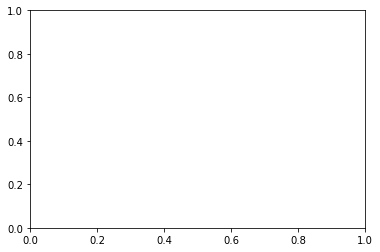

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn import datasets

df=pd.read_csv("dataready2019.csv")
print(df.head())

x=df['Trip Time'].value_counts()
y=df['Trip Time']
plt.scatter(y,x)
plt.show()


C:\Users\tiwar\AppData\Local\Temp\ipykernel_4008\4269995309.py:10: DtypeWarning: Columns (3,4,8,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("dataready2019.csv")


    trip_id          stoptime  bikeid tripduration  Trip Time  Trip Duration  \
0  21742443  01-01-2019 00:11    2167          390        6.5              6   
1  21742446  01-01-2019 00:43     252     1,783.00  29.716667             29   
2  21742447  01-01-2019 00:20    1170          364   6.066667              6   
3  21742448  01-01-2019 00:19    2437          216        3.6              3   
4  21742449  01-01-2019 00:19    2708          177       2.95              2   

   from_station_id  to_station_id    usertype  latitude_start  ...  day  hour  \
0              199             84  Subscriber       41.890912  ...    1     0   
1              123            176  Subscriber       41.922695  ...    1     0   
2              173             35  Subscriber       41.896910  ...    1     0   
3               98             49  Subscriber       41.882664  ...    1     0   
4               98             49  Subscriber       41.882664  ...    1     0   

   month    startday  weekend  h

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_id', ylabel='Trip Duration'>

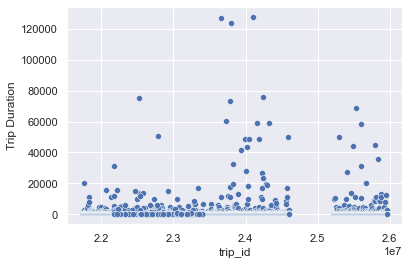

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn import datasets

sns.set()
df=pd.read_csv("dataready2019.csv")
print(df.head())

sns.scatterplot('trip_id','Trip Duration',data=df)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn import datasets

sns.set()
df=pd.read_csv("dataready2019.csv")
print(df.head())

sns.scatterplot('trip_id','Trip Duration',data=df)


C:\Users\tiwar\AppData\Local\Temp\ipykernel_4008\3045320873.py:10: DtypeWarning: Columns (3,4,8,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("dataready2019.csv")


    trip_id          stoptime  bikeid tripduration  Trip Time  Trip Duration  \
0  21742443  01-01-2019 00:11    2167          390        6.5              6   
1  21742446  01-01-2019 00:43     252     1,783.00  29.716667             29   
2  21742447  01-01-2019 00:20    1170          364   6.066667              6   
3  21742448  01-01-2019 00:19    2437          216        3.6              3   
4  21742449  01-01-2019 00:19    2708          177       2.95              2   

   from_station_id  to_station_id    usertype  latitude_start  ...  day  hour  \
0              199             84  Subscriber       41.890912  ...    1     0   
1              123            176  Subscriber       41.922695  ...    1     0   
2              173             35  Subscriber       41.896910  ...    1     0   
3               98             49  Subscriber       41.882664  ...    1     0   
4               98             49  Subscriber       41.882664  ...    1     0   

   month    startday  weekend  h

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue, style, size. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn preprocessing import  

sns.set()
df=pd.read_csv("dataready2019.csv")

print(df.head())

X=df[['trip_id','Trip Time']]

scaledX = scale.fit_transform(X)
#scaledX = scale.fit_transform(df[cont_columns])

print(scaledX)



C:\Users\tiwar\AppData\Local\Temp\ipykernel_11688\1773832201.py:10: DtypeWarning: Columns (3,4,8,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("dataready2019.csv")


    trip_id          stoptime  bikeid tripduration  Trip Time  Trip Duration  \
0  21742443  01-01-2019 00:11    2167          390        6.5              6   
1  21742446  01-01-2019 00:43     252     1,783.00  29.716667             29   
2  21742447  01-01-2019 00:20    1170          364   6.066667              6   
3  21742448  01-01-2019 00:19    2437          216        3.6              3   
4  21742449  01-01-2019 00:19    2708          177       2.95              2   

   from_station_id  to_station_id    usertype  latitude_start  ...  day  hour  \
0              199             84  Subscriber       41.890912  ...    1     0   
1              123            176  Subscriber       41.922695  ...    1     0   
2              173             35  Subscriber       41.896910  ...    1     0   
3               98             49  Subscriber       41.882664  ...    1     0   
4               98             49  Subscriber       41.882664  ...    1     0   

   month    startday  weekend  h

NameError: name 'scale' is not defined

In [1]:
import tensorflow
